# Titanic Classifer
## Problem Statement :
Given data of the passengers of the Titanic in 1912 when it sank predict the survival of passengers given their features such as Pclass, fare, age, etc. 

In [57]:
# import necessary libraries
import numpy as np                 # manipulating arrays
import scipy.stats                 # mathematical algorithms
import csv                         # opening csvs
import pandas as pd                # manipulating tabular data
import matplotlib.pyplot as plt    # regression plot
import math
import seaborn as sns
from scipy.stats import chi2_contingency

## Data Collection and Data Analysis


In [58]:
train_data = pd.read_csv("./data/train.csv", index_col='PassengerId')
test_data = pd.read_csv("./data/test.csv")

train_data.head(15)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [59]:
test_data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Some of features we can already start removing. For instance the TicketId all passengers will have unique ticket ids therefore it does not contribute to the realationship we are trying to formulate. We could categories the ticket values by looing at their last digit and bucketing each passentger to a bucket from [0 to 9], however for this report we will be ignoring the ticket id. 

Statistical Reports on data set:

In [60]:
train_data.describe(include="all") 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [61]:
test_data.describe(include="all")  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


From the chart above we can discover the data. First we see from the train data set that htere seems to be missing entries for the ages of the passengers. This needs to be addressed by either filling the missing values with some items so the swkeeness of the data is not affected. The same goes for the test data wehere the Age has missing values as well as one missing value in the fare. All of such cases must be addressed before prcessing the data. Second the chart above also describes statistical tools used on each feature. In particular we are interested in the survival data. From the train data set, we get the average survival rate of the passengers is ~38.38% with the high standard deviation of ~0.4865 from the mean. Looking at the mean of the Pclass {1,2,3} we get the mean as ~2.265 indicating that there was a higher proportion of passengers in the second and the third class. This will be helpful when we are determining which features are core to the our report. Likewise the mean age is ~29.69 with standard deviation of ~14.18 indicating a large deviation from the mean. SibSp indicates the number of sibilihgs or spouse and the mean is ~0.44. Parch indicates the number of parents/children aboard for ll passengers. The fare give how much each passenger paid to be on the ship with a mean of ~35.627. Other features are non-numerical. Furhtermore, there are null values in the age, cabin, and embarked section. 

In [62]:
#Data types present in the source
print(train_data.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


## Cleaning Data:

#### To dos: 
1. Remove cabin, passengerid, ticket as they have not very high replication or are incomplete
2. Create a family based on Parch and SibSp to get total count of family member on board
3. Consider turning some features into bucket to form a categorical feature



In [63]:
# Make the Sex data quantative: 
# train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
#train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

## Testing Feature relation to Survival rates:
During this process we will first find which features are important to the survival rate of the passengers and clean the data set to use only the found releavant features. 


### Did the class of the passengers effect their survival rate


Survived    0    1  Survival Rate
Pclass                           
1          80  136       0.629630
2          97   87       0.472826
3         372  119       0.242363


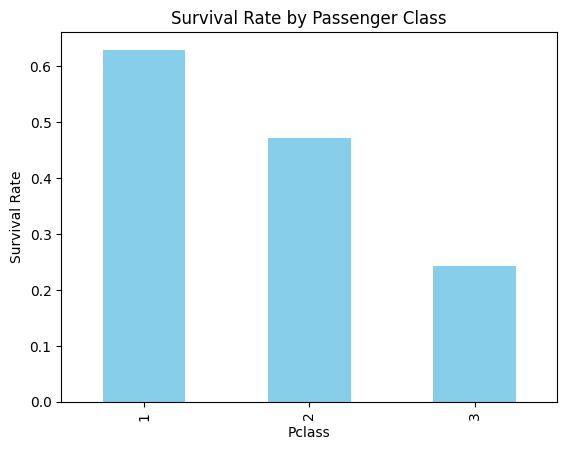

Chi-Square Statistic: 102.88898875696056, p-value: 4.549251711298793e-23


In [64]:
#Visualization: 
pivot_class_survived = train_data.pivot_table(index='Pclass', columns='Survived', aggfunc='size', fill_value=0)

#Survival rate by class
pivot_class_survived['Survival Rate'] = pivot_class_survived[1] / (pivot_class_survived[0] + pivot_class_survived[1])
print(pivot_class_survived)

# Plotting the survival rate by class
pivot_class_survived['Survival Rate'].plot(kind='bar', color='skyblue')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

chi2, p, dof, ex = chi2_contingency(pivot_class_survived[[0, 1]])
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")


The above is significant as it indicate that passengers with higher classes had more chance of survival as compared to lower classes. The p-value is less than 0.05 which is a threshold of for statistical significance and indicates a high relation. The chi-square value is also very high indication a significant deviation from the null hypothesis that says that there is no relation. 

### Does sex play a part in the survival rate? 
Since P-class is a contributor to the rates of survival, then we can categorize for each class the seperate genders and calculate the survival rates. 

In [65]:
#Show survival rate of different pclasses interms of gender: 
train_data[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()




Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

The averages of the classes show that upper class female had a higher survival rate than other but also shows that females have a higher survival rate than their counterpart. 

In [66]:
contingency_table = pd.crosstab(train_data['Sex'], train_data['Survived'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

Chi-Square Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58


There is an even higher Chi-square value and an even lower p-value showing a stronger correaltion to the survival rate than the feature Pclass. 

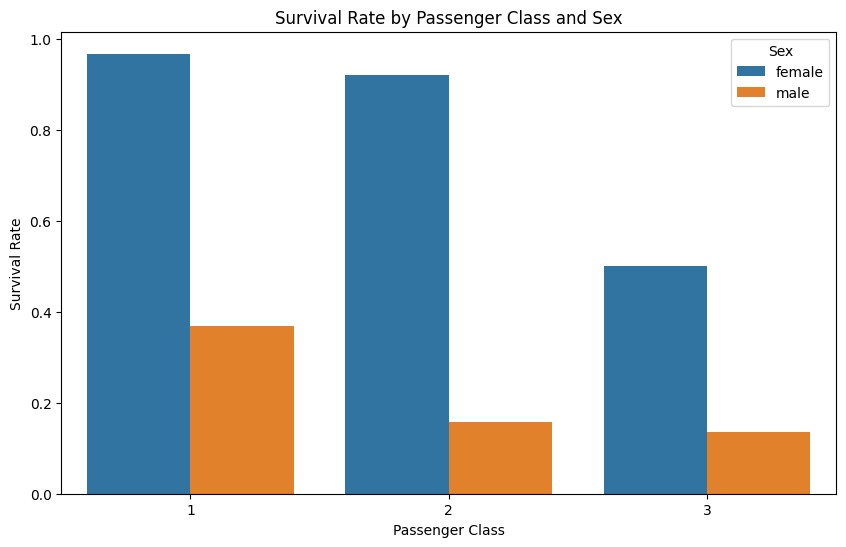

In [67]:
grouped_data = train_data[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean().reset_index()

# Bar graph to visualize the relation
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=grouped_data)

plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')

# Show the plot
plt.show()

### Is Age a contributor to the Survival Rates
Lets have a look at how each age play to the survival rates: 


Before the visualization: we have the 

<Figure size 1000x1000 with 0 Axes>

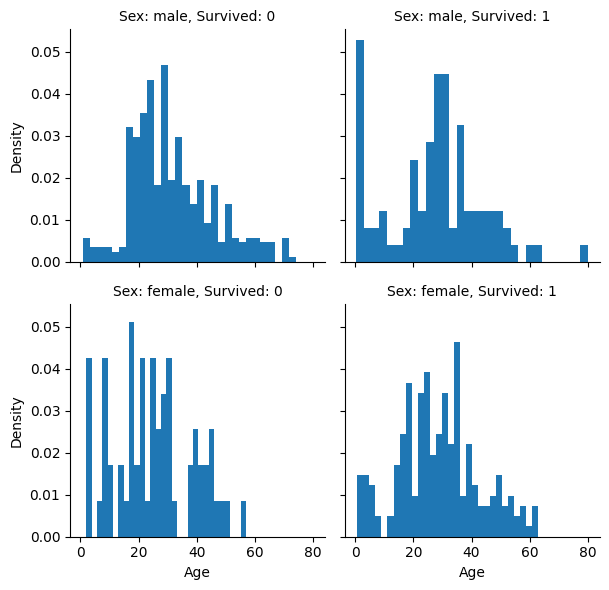

In [79]:
# Assuming 'train_data' is your DataFrame and it includes 'Survived', 'Sex', and 'Age'
plt.figure(figsize=(10, 10))

# Create a FacetGrid with normalized histograms
g = sns.FacetGrid(train_data, row='Sex', col='Survived')
g.map(plt.hist, 'Age', bins=30, density=True)

# Adding labels and titles for clarity
g.set_xlabels('Age')
g.set_ylabels('Density')
g.set_titles('Sex: {row_name}, Survived: {col_name}')

# Display the plot
plt.show()

In [84]:
import statsmodels.api as sm

age_bins = [0, 18, 30, 40, 50, 60, 120]  # Adjust the bins as you see fit
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create a new column for the age groups
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Create the contingency table
contingency_table = pd.crosstab(train_data['AgeGroup'], train_data['Survived'])

# Apply the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 21.173811784554662
p-value: 0.0007510364409988181


In [77]:
num_females = train_data['Sex'].value_counts()['female']
num_males = train_data['Sex'].value_counts()['male']

print(f"Number of females: {num_females}")
print(f"Number of males: {num_males}")


Number of females: 314
Number of males: 577


From the above these things are observed there is definately a realation between age and the survivial however it does not seem to be as significant. When we put the ages into buckets and do a chi-square analysis and p-value, the values definitely show there is a relation between age and survival rate however, it is not as significant as the other feature we have discovered so far. 

### Does having Siblings or spouse influence the survival rate


In [85]:
contingency_table = pd.crosstab(train_data['SibSp'], train_data['Survived'])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 37.2717929152043
p-value: 1.5585810465902147e-06


### Does having Parents influence the survival rate



In [86]:
contingency_table = pd.crosstab(train_data['Parch'], train_data['Survived'])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 27.925784060236168
p-value: 9.703526421039997e-05


### Fare Rate influence on Survival rates


In [88]:
# Define fare bins and labels
fare_bins = [0, 25, 50, 100, 200, np.inf]
fare_labels = ['0-25', '26-50', '51-100', '101-200', '200+']
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels)

# Create the contingency table
contingency_table_fare = pd.crosstab(train_data['FareBin'], train_data['Survived'])

# Perform the Chi-Square Test
chi2_fare, p_value_fare, dof_fare, expected_fare = chi2_contingency(contingency_table_fare)
print(f"Chi-Square Statistic for Fare: {chi2_fare}")
print(f"p-value for Fare: {p_value_fare}")


Chi-Square Statistic for Fare: 80.18578483773231
p-value for Fare: 1.590906917104074e-16


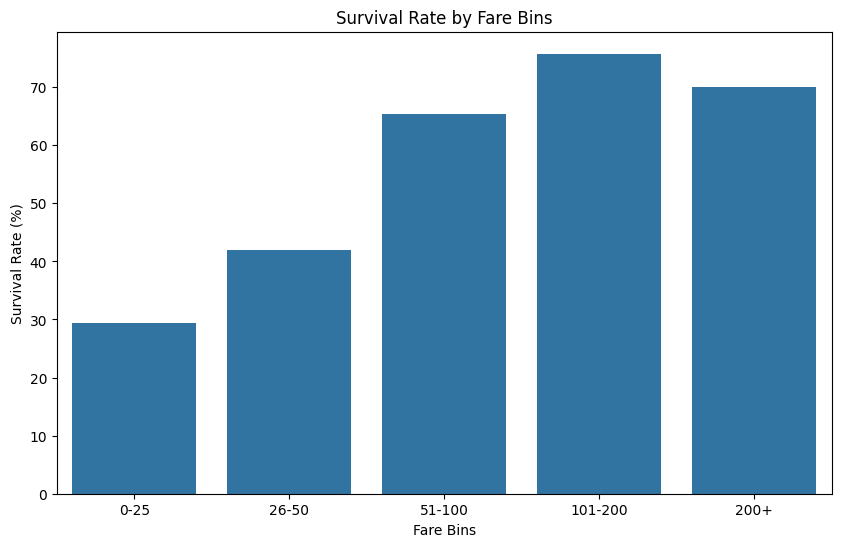

In [89]:
survival_rate_by_fare = (contingency_table_fare[1] / contingency_table_fare.sum(axis=1)) * 100

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_fare.index, y=survival_rate_by_fare.values)
plt.title('Survival Rate by Fare Bins')
plt.xlabel('Fare Bins')
plt.ylabel('Survival Rate (%)')
plt.show()

### Does where a passenger Embarked influence their Survival Rate

In [90]:
contingency_table_embarked = pd.crosstab(train_data['Embarked'], train_data['Survived'])

# Perform the Chi-Square Test
chi2_embarked, p_value_embarked, dof_embarked, expected_embarked = chi2_contingency(contingency_table_embarked)

# Output the results
print(f"Chi-Square Statistic for Embarked: {chi2_embarked}")
print(f"p-value for Embarked: {p_value_embarked}")

Chi-Square Statistic for Embarked: 26.48914983923762
p-value for Embarked: 1.769922284120912e-06


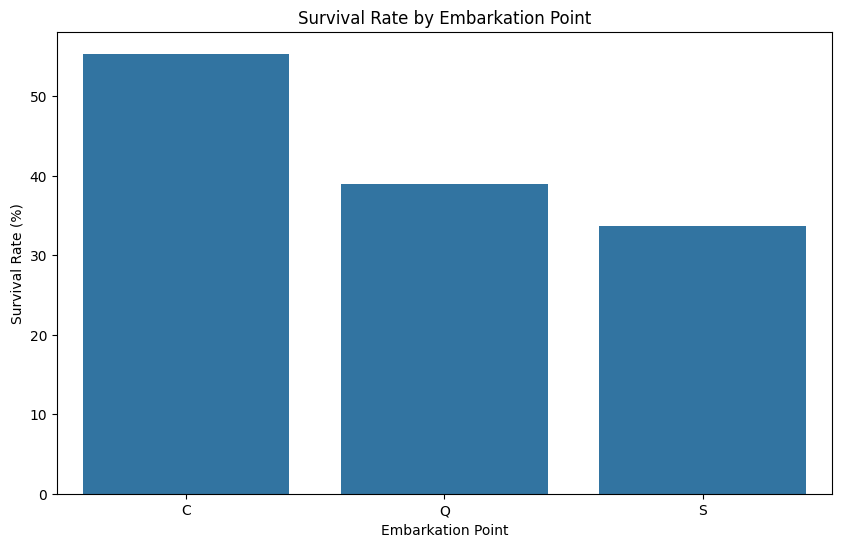

In [91]:
survival_rate_by_embarked = (contingency_table_embarked[1] / contingency_table_embarked.sum(axis=1)) * 100

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_embarked.index, y=survival_rate_by_embarked.values)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate (%)')
plt.show()